## Life cycle of data science

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

#### Data analysis phase

Data analysis phase is required to understand more about the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To display all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv(r'F:\DS_ML\Kaggle_compititions\House Prices Advanced Regression Techniques\train.csv')

In [3]:
#checking the shape of the dataset
print(dataset.shape)

(1460, 81)


In [4]:
#checking the dataset

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<b>Data analysis phase includes</b>

1. Missing Values
2. All the numerical variables
3. Distribution of the numerical values
4. Categorical variables
5. Cardibility of Categorical variables
6. Outliers
7. Relationship between independent and dependent feature(SalesPrice)

<b>Missing values</b>

In [5]:
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_nan:
    print(feature, np.round(dataset[feature].isnull().mean(),4), ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


<i>Since there are many missing values, Lets check the relationship b/n missing values and SalesPrice</i>

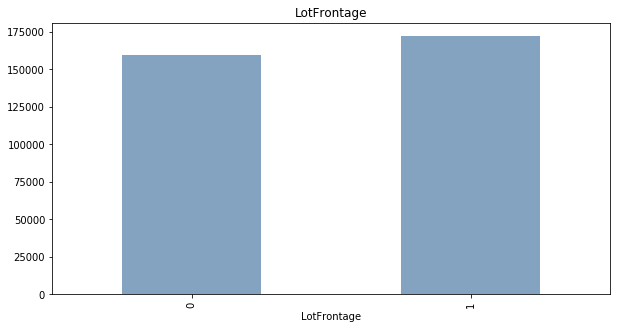

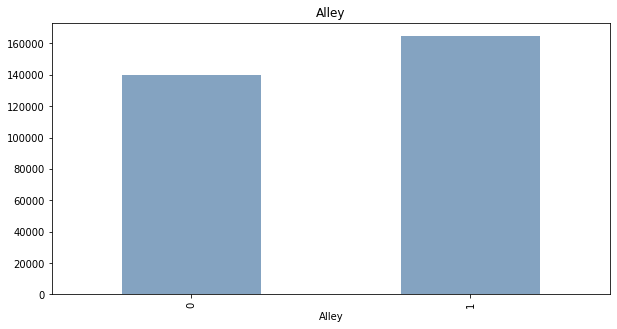

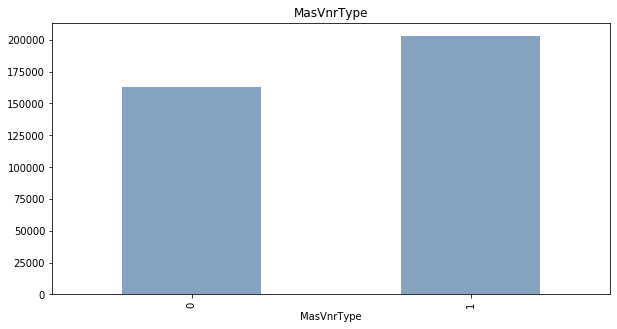

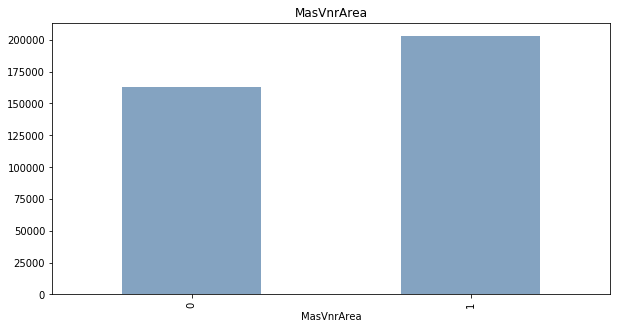

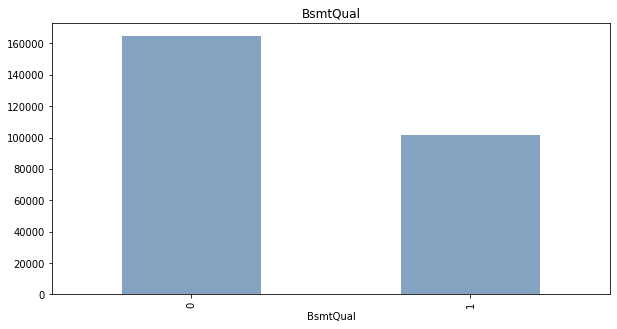

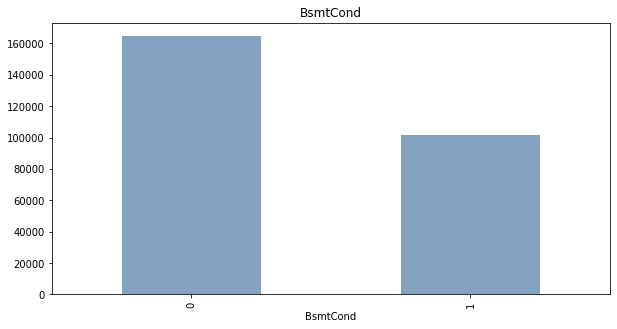

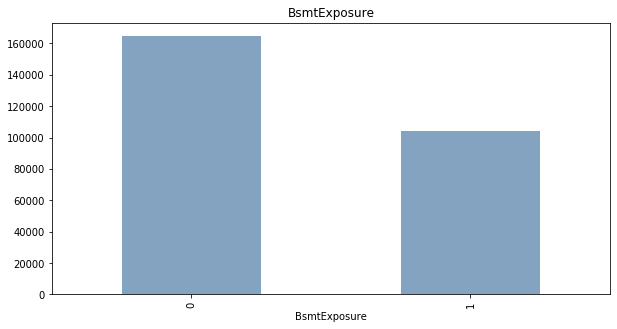

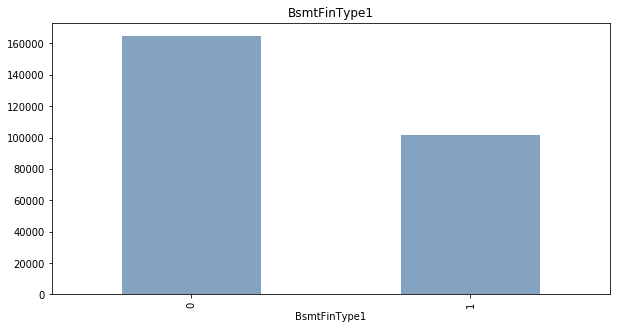

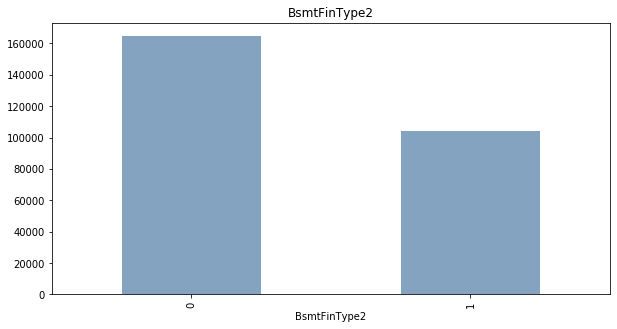

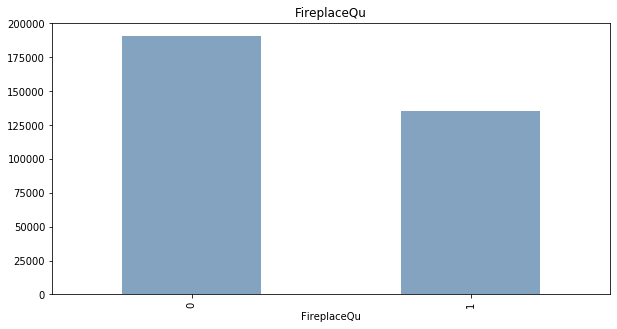

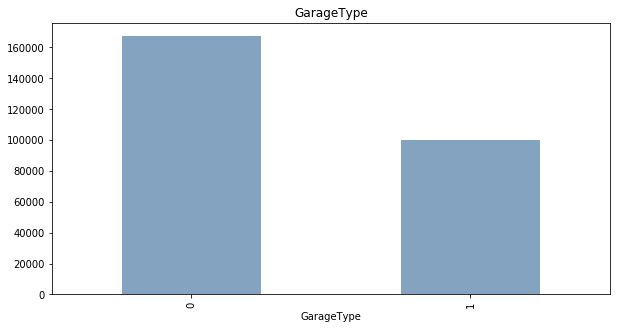

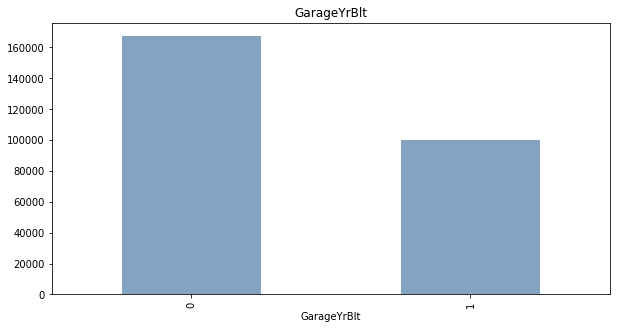

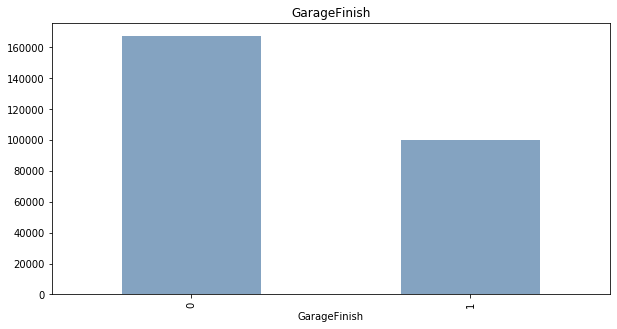

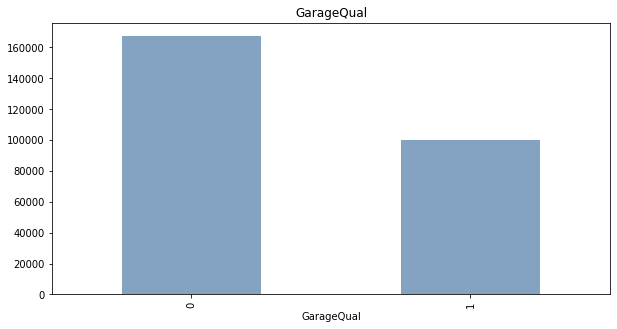

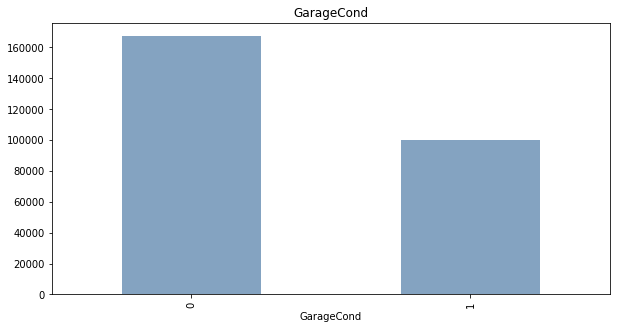

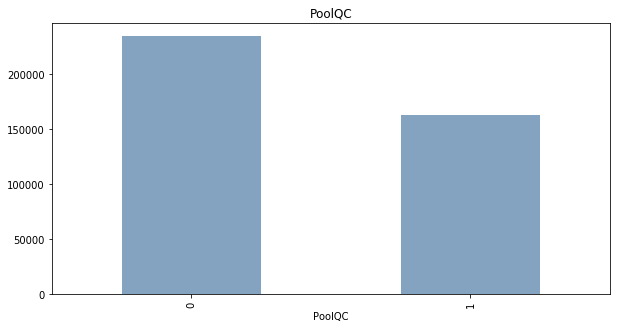

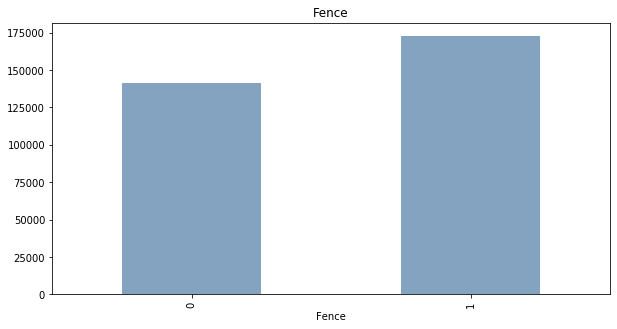

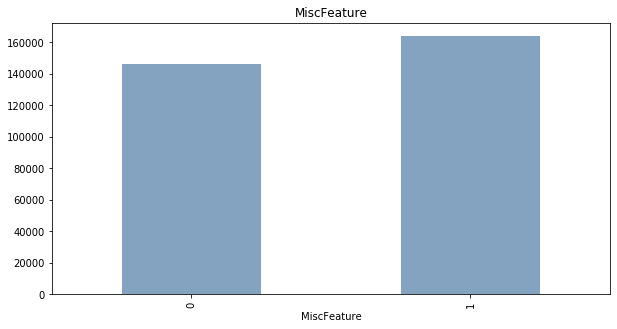

In [51]:
plt.style.use('tableau-colorblind10')
for feature in features_with_nan:
    data = dataset.copy()
    
    #making a variabe that indicates 1 if the observation was missing or else zero
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    # checking the mean salesprice where the info is missing or not
    
    data.groupby(feature)['SalePrice'].median().plot.bar(figsize=(10,5),color=(0.2, 0.4, 0.6, 0.6))
    plt.title(feature)
    plt.show();

we can infer that there is some relation between the missing values and the Saleprice so we need to replace these missing values with something that is meaningful which will be taken care in feature engineering.


Some features like id are not required

In [8]:
print('Id of the Houses {}'.format(len(dataset['Id'])))

Id of the Houses 1460


<b>Numerical Variables</b>

In [9]:
# List of numerical variables

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables {}'.format(len(numerical_features)))

#See the numerical variables

dataset[numerical_features].head()

Number of numerical variables 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


<b>Temporal variables(Datetime variables)</b>

We have 4 year variables 

In [10]:
# list of variables that contain year information

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
#Lets see the content of these variables

for feature in year_feature:
    print(feature,dataset[feature].unique())
    print('*'*100)

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
****************************************************************************************************
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 19

<i>Lets check weather there is a relation between year the house sold and SalePrice</i>

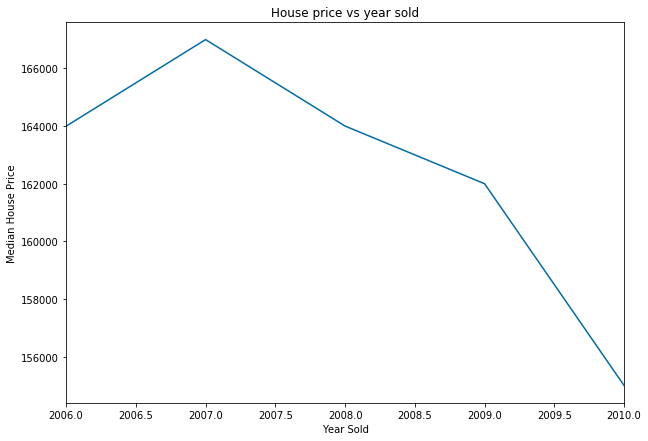

In [14]:
dataset.groupby('YrSold')['SalePrice'].median().plot(figsize=(10,7))
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House price vs year sold');

The above plot shows that this seems to be not true compared to reality

In [15]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

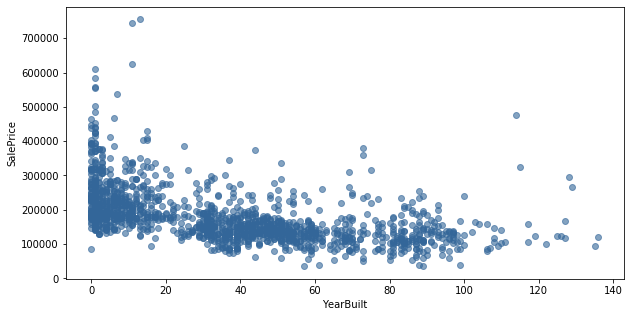

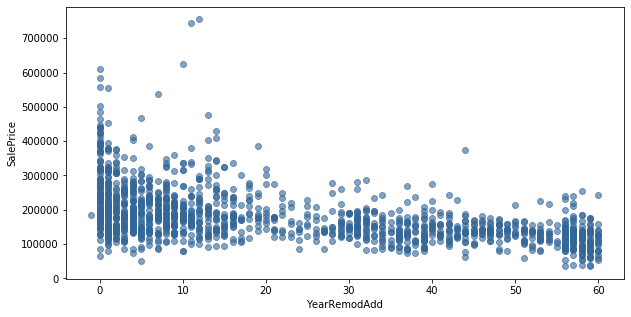

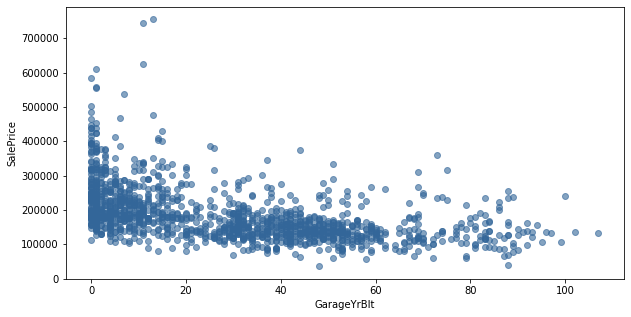

In [50]:
# Lets compare the difference between all Year features and Year Sold with Saleprice

for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        
        data[feature] = data['YrSold']-data[feature]
        plt.figure(figsize=(10,5))
        plt.scatter(data[feature],data['SalePrice'],color=(0.2, 0.4, 0.6, 0.6))
        plt.xlabel(feature)
        
        plt.ylabel('SalePrice')
        plt.show();

In [23]:
# numerical variables can usually of two types continuous and discrete

discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]

print('Discrete numerical variables count is {}'.format(len(discrete_features)))

Discrete numerical variables count is 17


In [25]:
print(discrete_features)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [26]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


<i>Lets check the relation between discrete features and SalePrice</i>

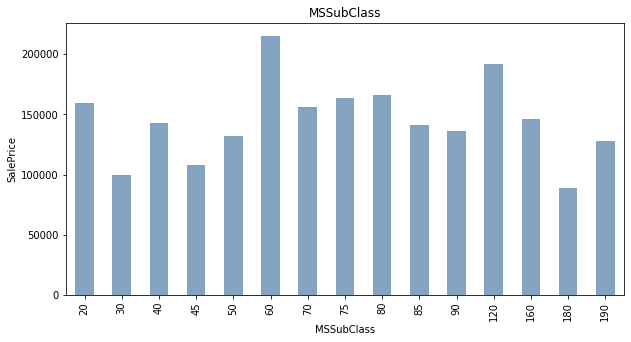

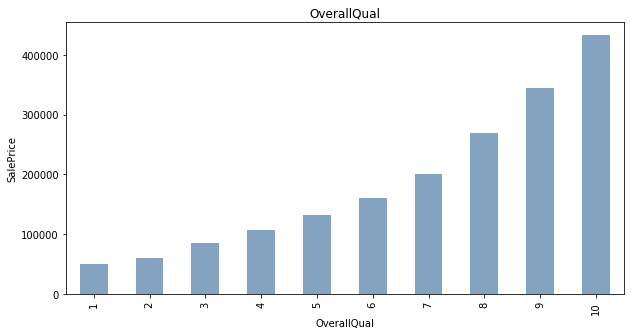

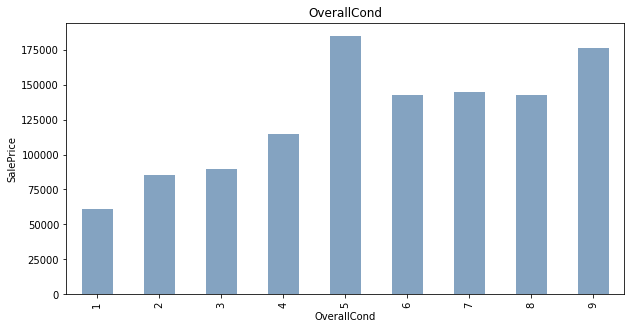

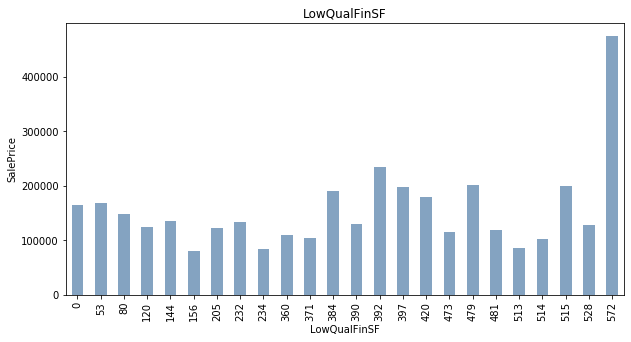

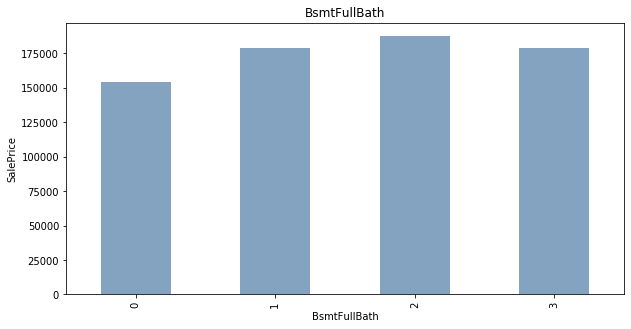

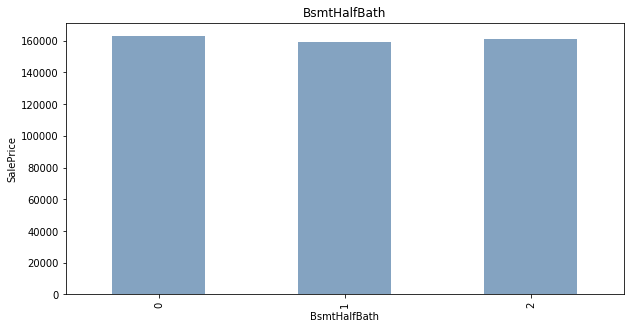

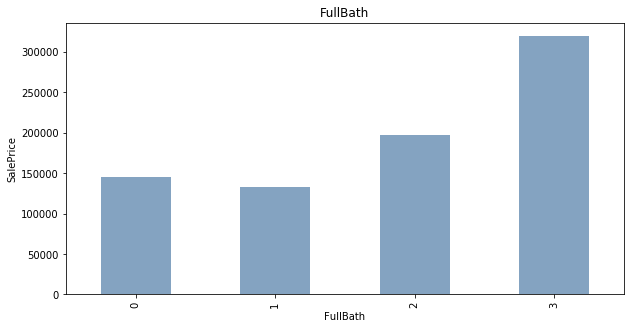

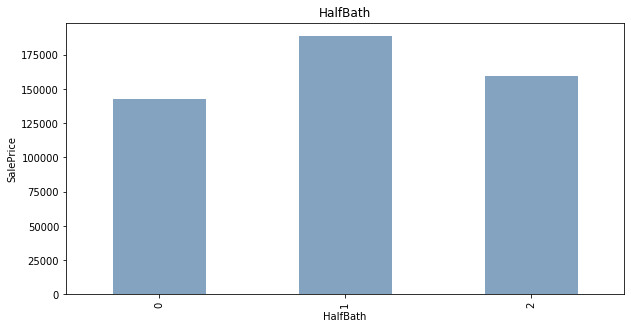

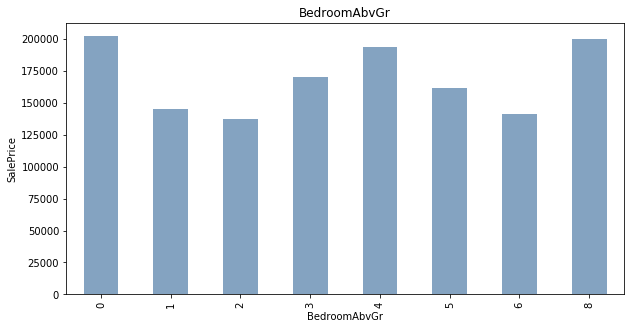

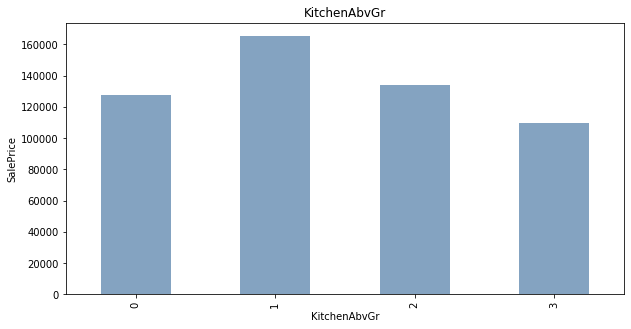

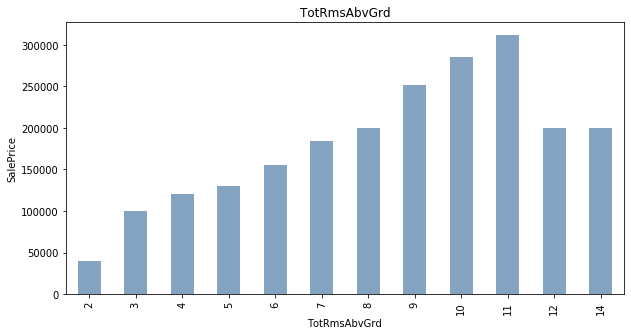

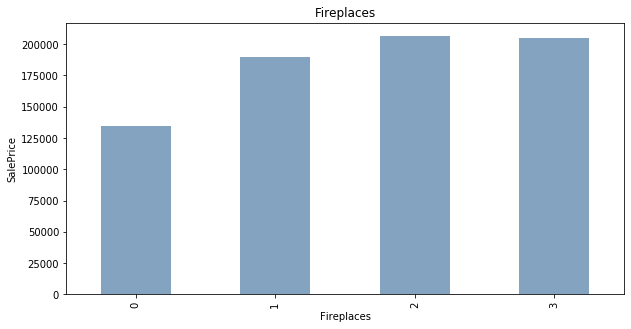

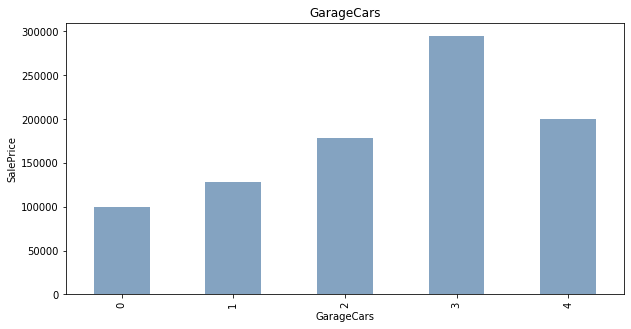

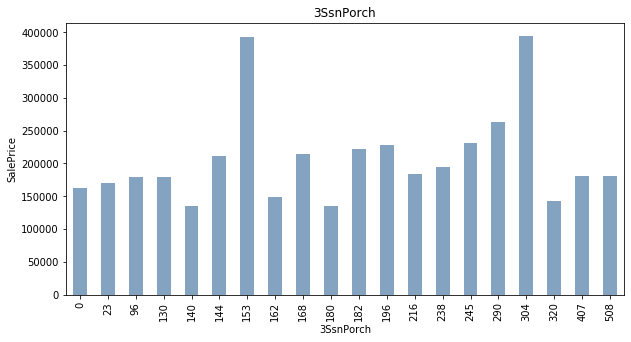

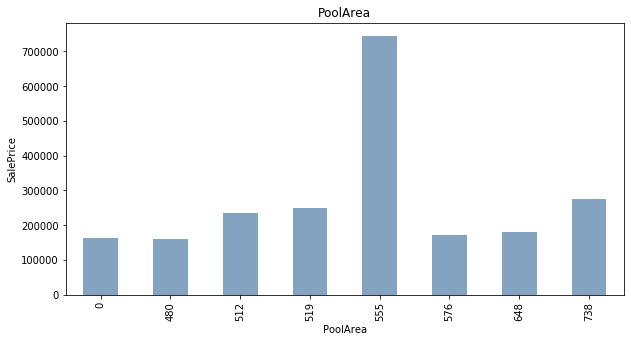

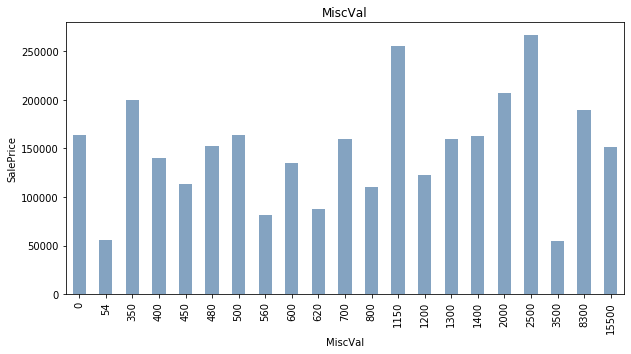

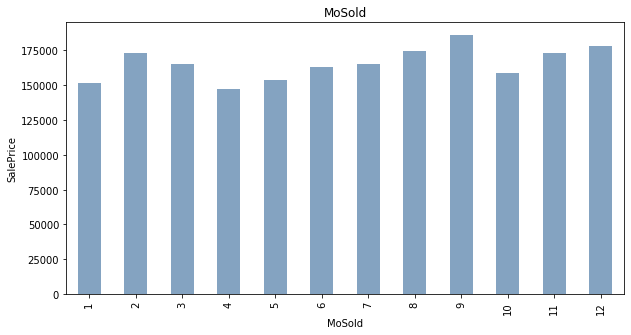

In [49]:
for feature in discrete_features:
    data = dataset.copy()
    data[feature] = data.groupby(feature)['SalePrice'].median().plot.bar(figsize=(10,5),color=(0.2, 0.4, 0.6, 0.6))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

The above plot shows that there is a relation ship between discrete numerical variables and SalePrice

<b>Continuous variables</b>

In [53]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]

print('number of continuous features available in data are {}'.format(len(continuous_features)))

number of continuous features available in data are 16


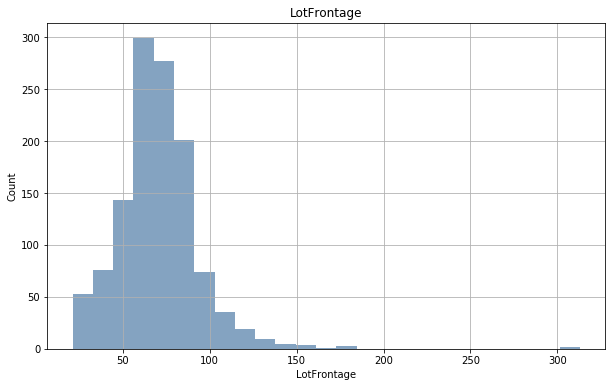

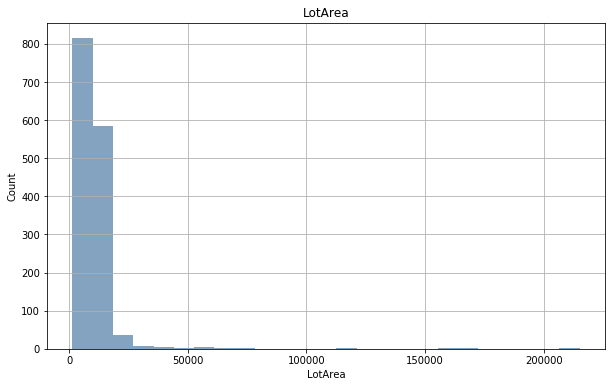

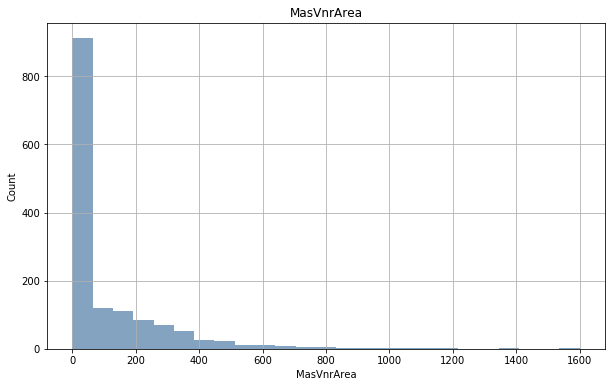

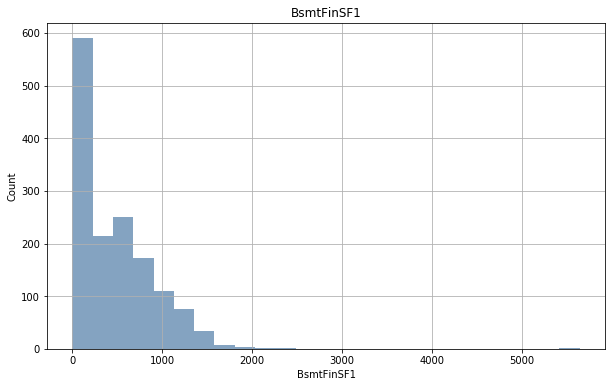

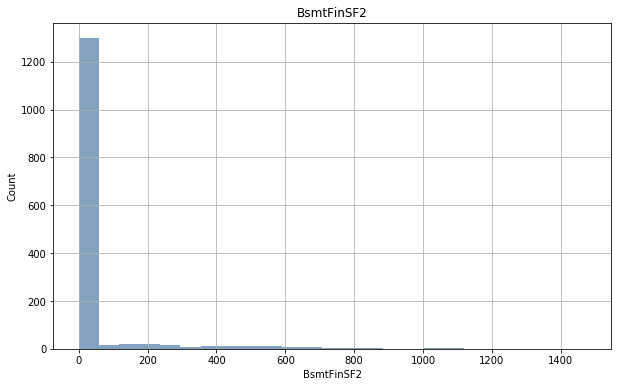

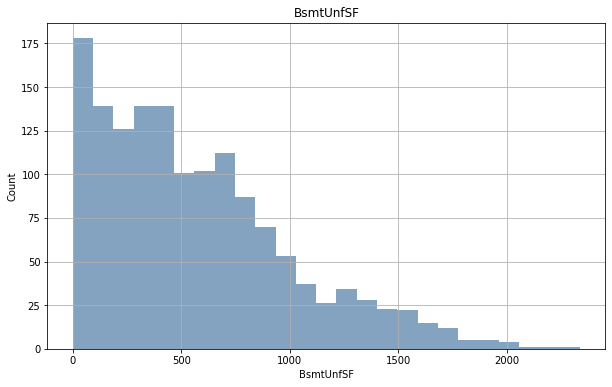

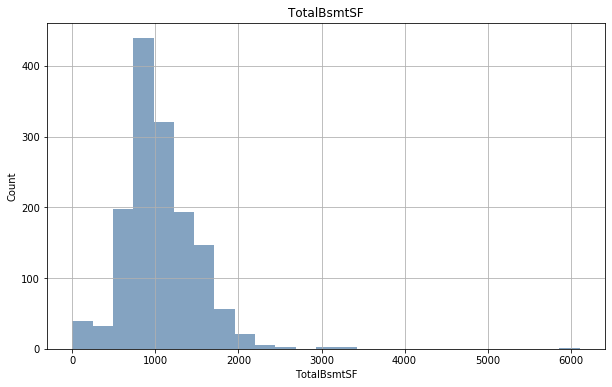

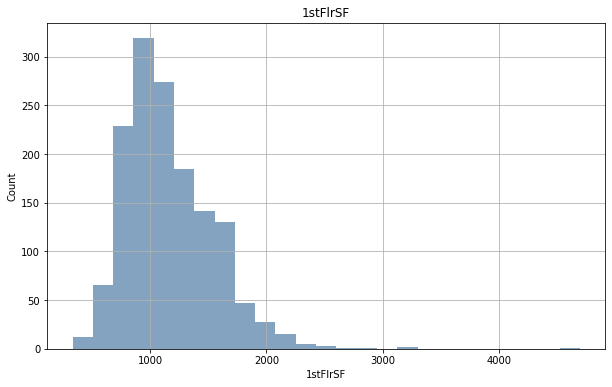

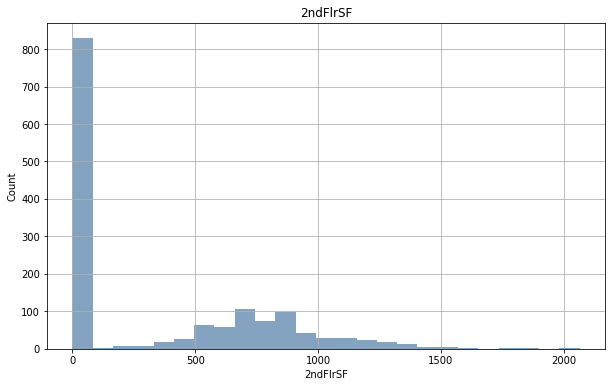

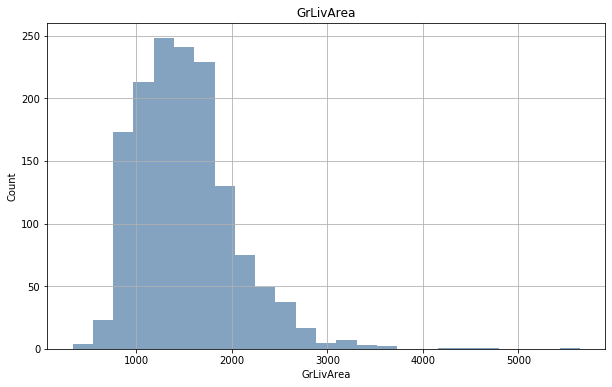

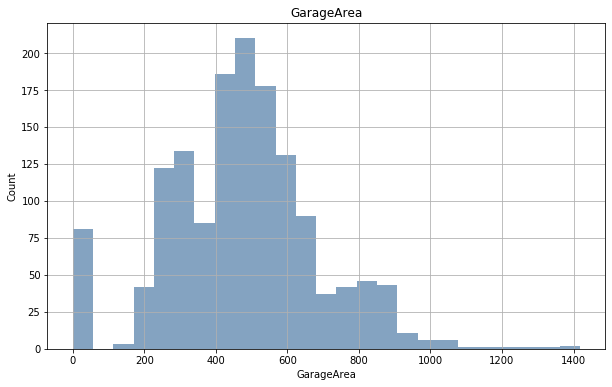

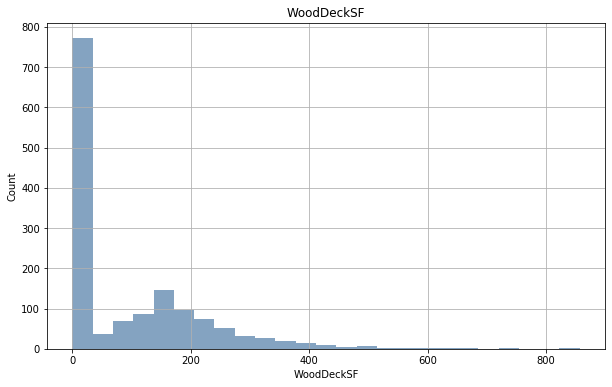

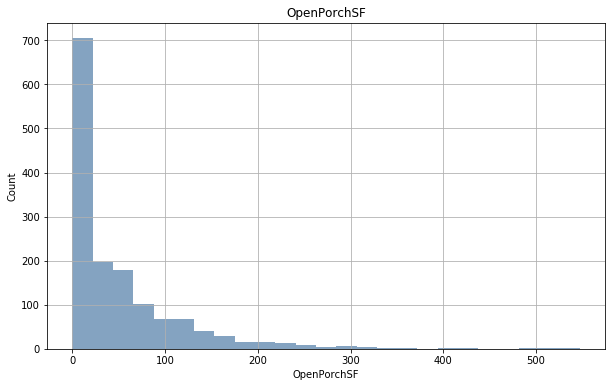

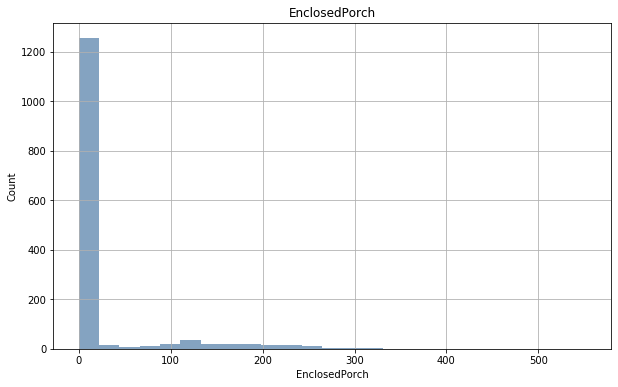

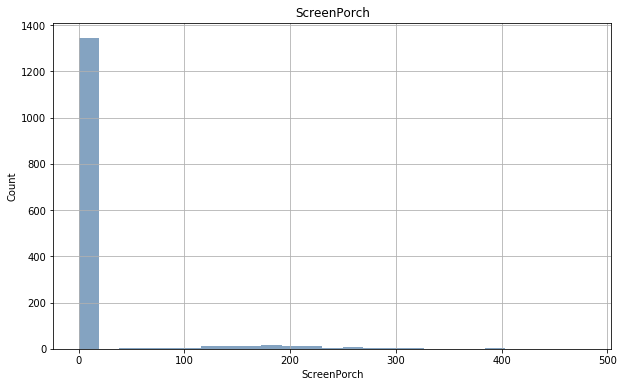

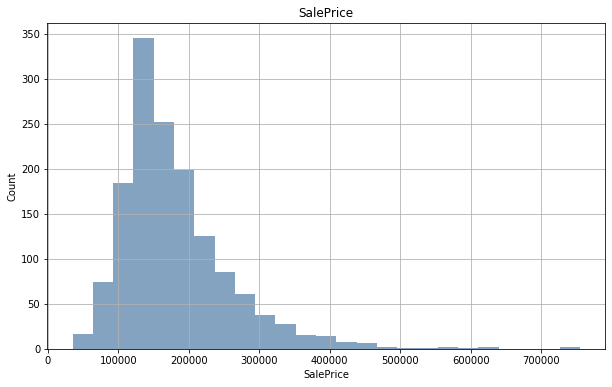

In [54]:
# Lets analyse the continuous variables by creating histograms to understand the data distribution

for feature in continuous_features:
    data = dataset.copy()
    
    data[feature].hist(bins=25,color=(0.2, 0.4, 0.6, 0.6),figsize=(10,6))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Fron the above figures some of the features are having gaussian distribution and some of the features are not having the gaussian distributions that results in skewed data we will handle these in feature engineering.

When ever we are solving a regression we need to normalize the data into gausian distribution or normal distribution

<b>using logarithmic transformation</b>

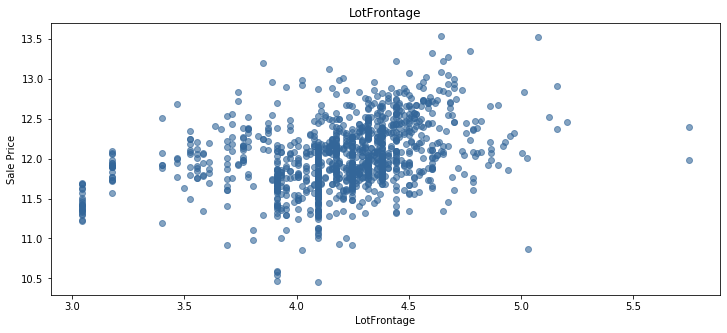

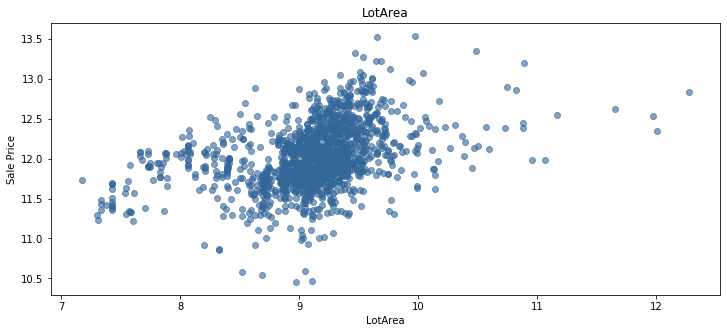

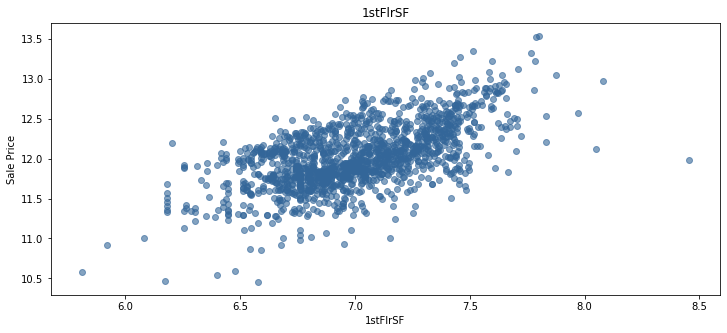

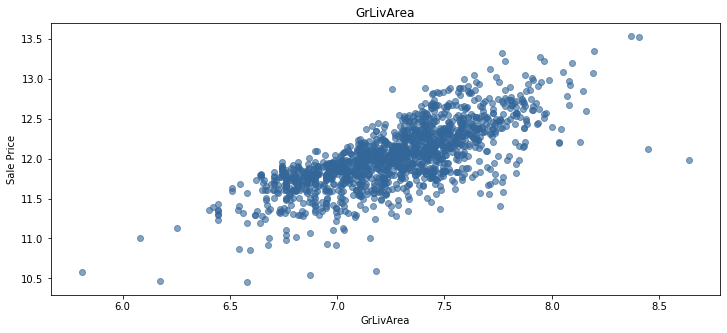

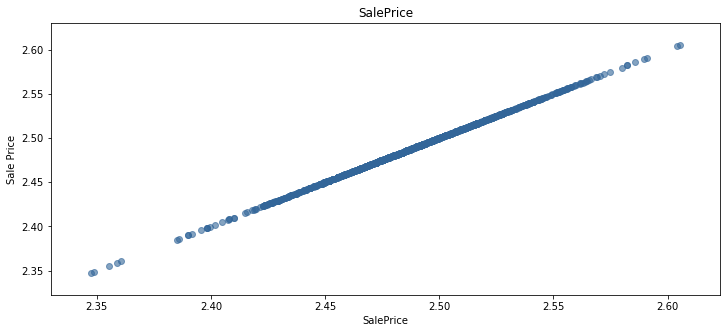

In [70]:
for feature in continuous_features:
    data = dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        
        #plotting the relation between logarthmic transformation of categorical features and salesprice log transformation
        plt.figure(figsize=(12,5))
        plt.scatter(data[feature],data['SalePrice'],color=(0.2, 0.4, 0.6, 0.6))
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature)
        plt.show();

<b>outliers</b>

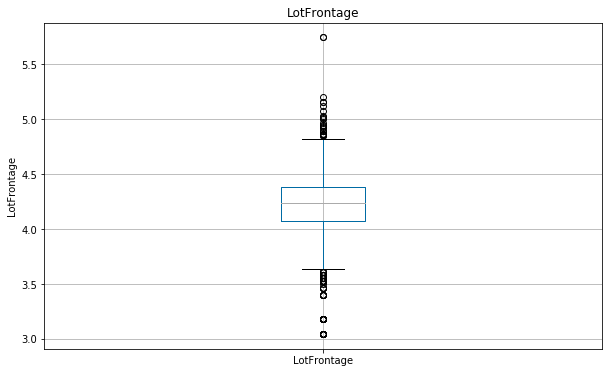

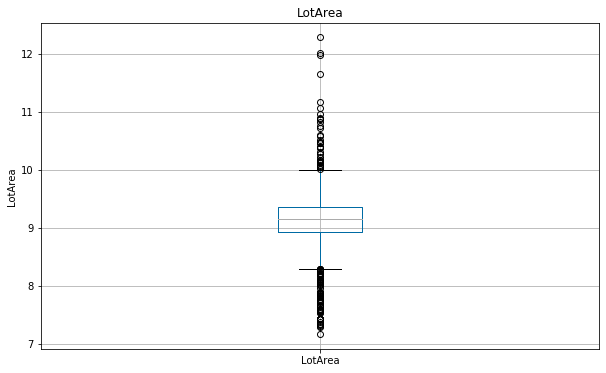

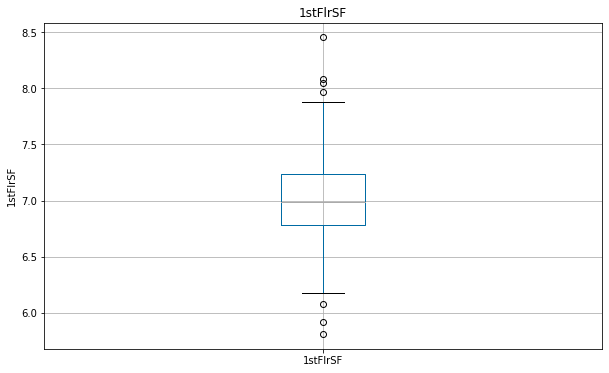

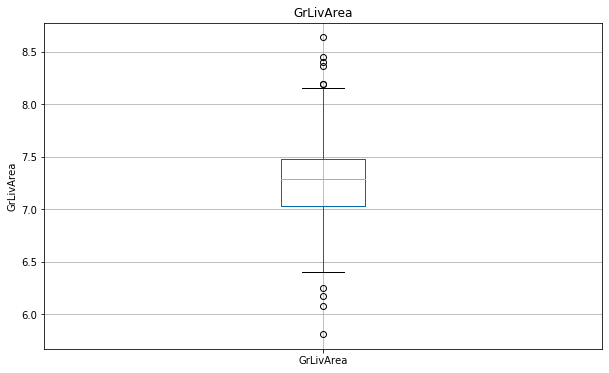

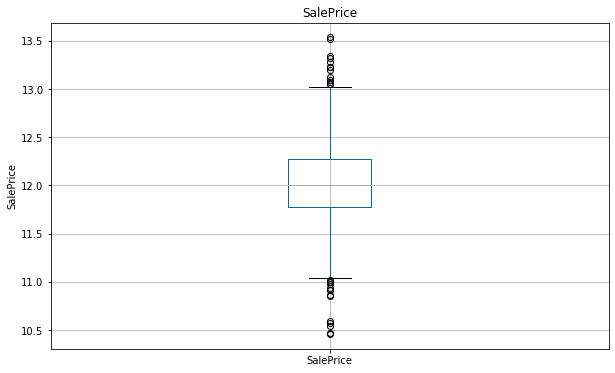

In [73]:
for feature in continuous_features:
    data = dataset.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        # boxplot for outlier detection 
        data.boxplot(column=feature,figsize=(10,6))
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

There are outliers in the continuous variables so we need to handle the outliers which can be done in feature engineering 

<b>Categorical Variables</b>

In [63]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']

print('There are {} categorical features in the data'.format(len(categorical_features)))
print('-'*60)
print(categorical_features)

There are 43 categorical features in the data
------------------------------------------------------------
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [64]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [69]:
for feature in categorical_features:
    print('The {} category is having {} categories'.format(feature,len(dataset[feature].unique())))

The MSZoning category is having 5 categories
The Street category is having 2 categories
The Alley category is having 3 categories
The LotShape category is having 4 categories
The LandContour category is having 4 categories
The Utilities category is having 2 categories
The LotConfig category is having 5 categories
The LandSlope category is having 3 categories
The Neighborhood category is having 25 categories
The Condition1 category is having 9 categories
The Condition2 category is having 8 categories
The BldgType category is having 5 categories
The HouseStyle category is having 8 categories
The RoofStyle category is having 6 categories
The RoofMatl category is having 8 categories
The Exterior1st category is having 15 categories
The Exterior2nd category is having 16 categories
The MasVnrType category is having 5 categories
The ExterQual category is having 4 categories
The ExterCond category is having 5 categories
The Foundation category is having 6 categories
The BsmtQual category is hav

<i>Lets check the relation between categorical features with respect to Sale Price</i>

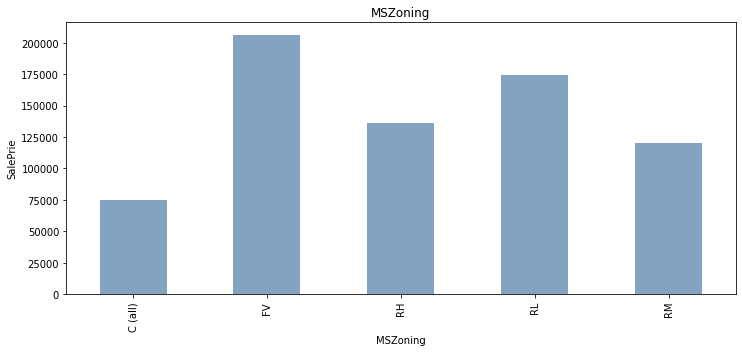

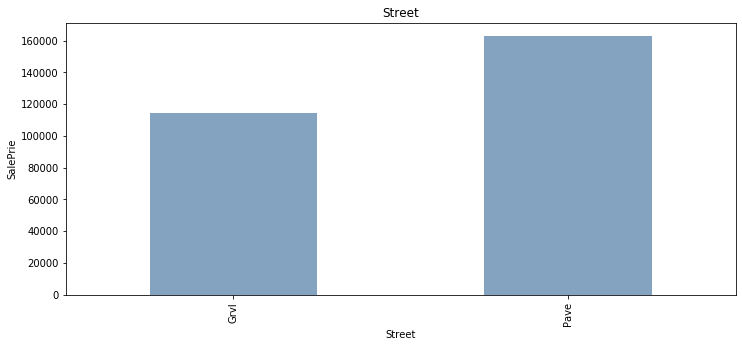

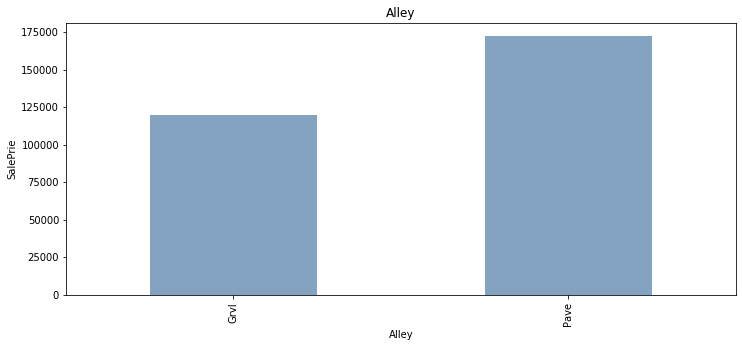

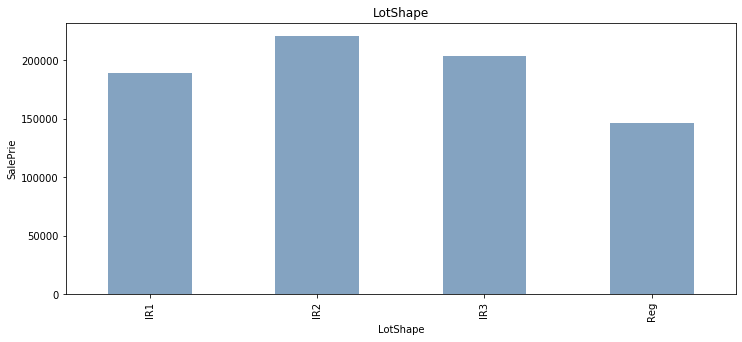

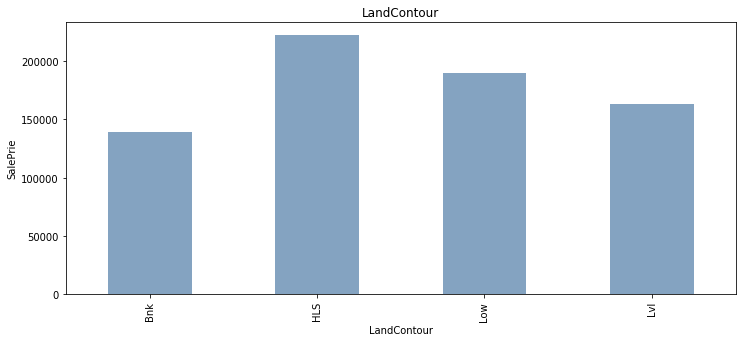

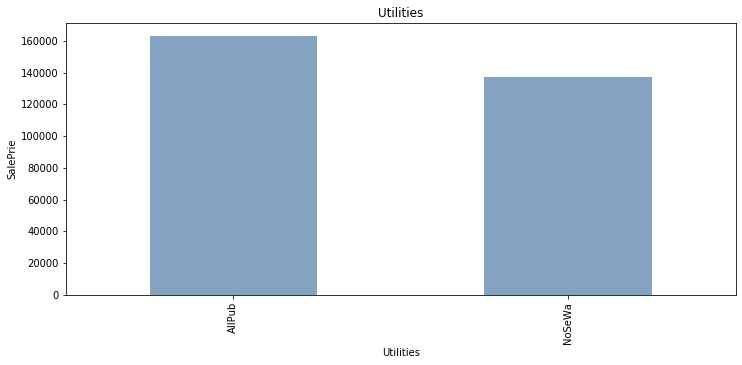

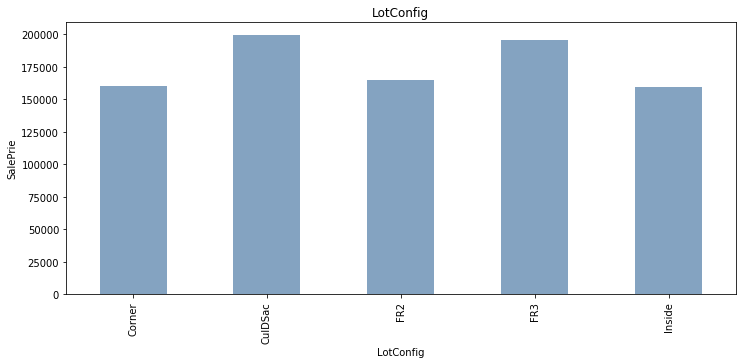

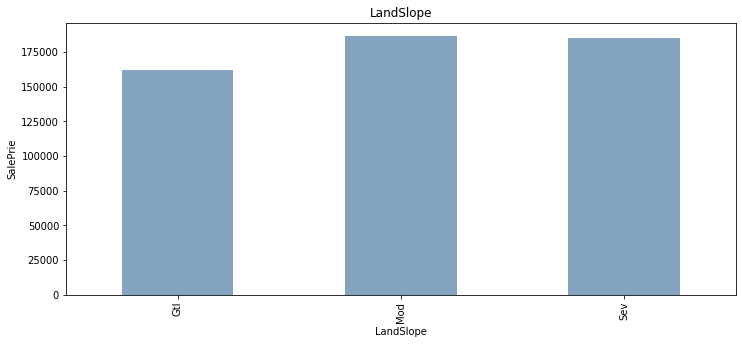

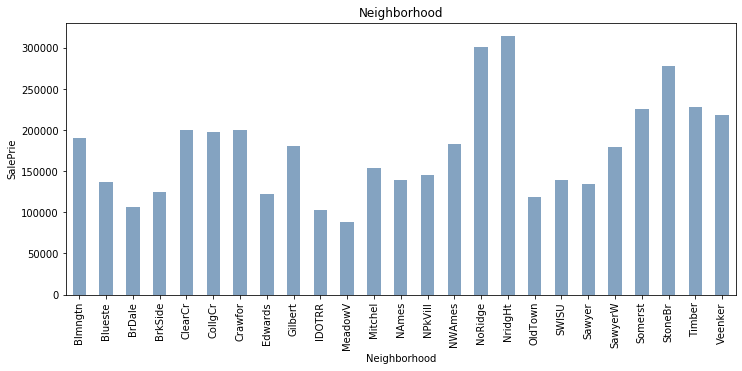

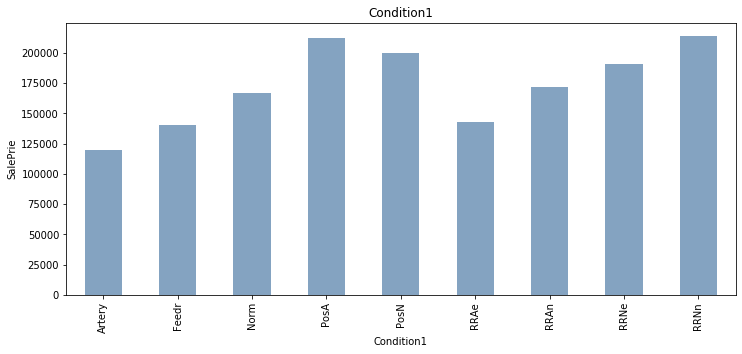

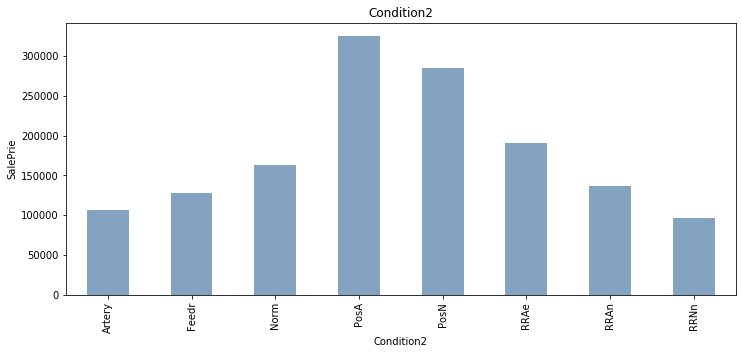

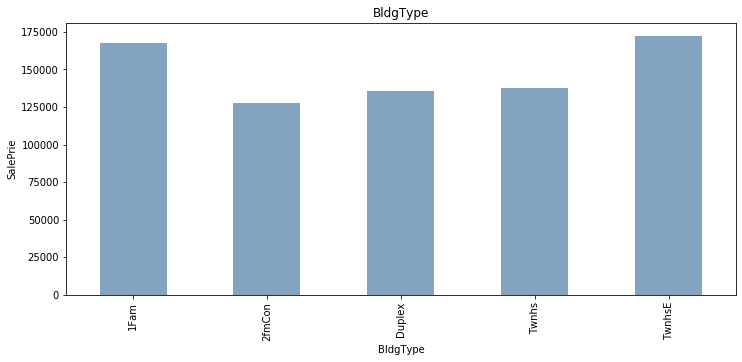

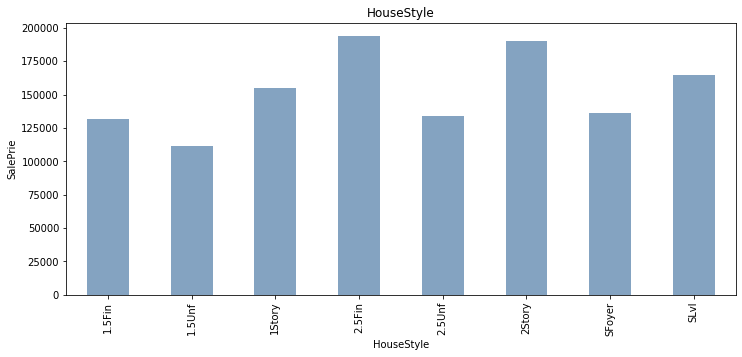

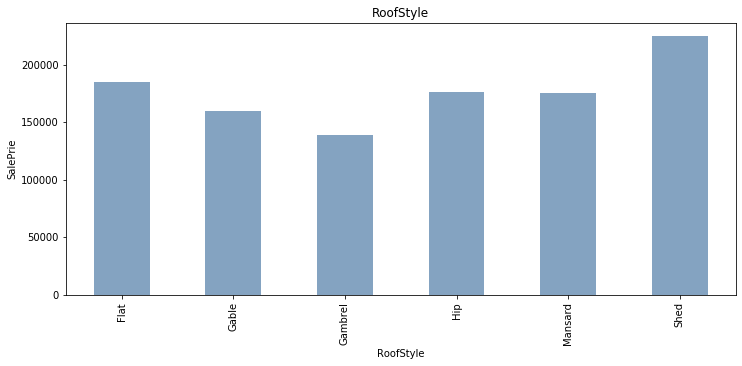

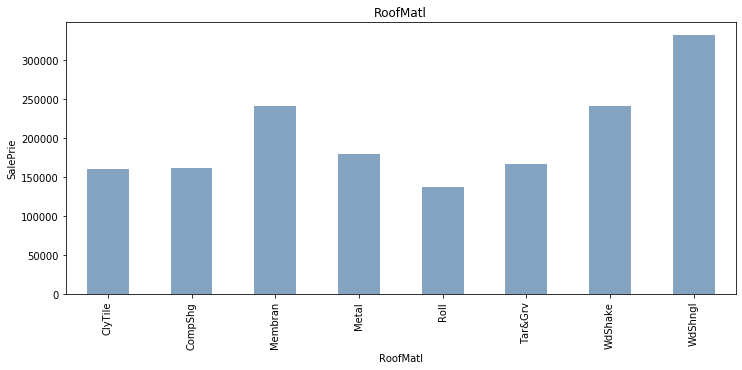

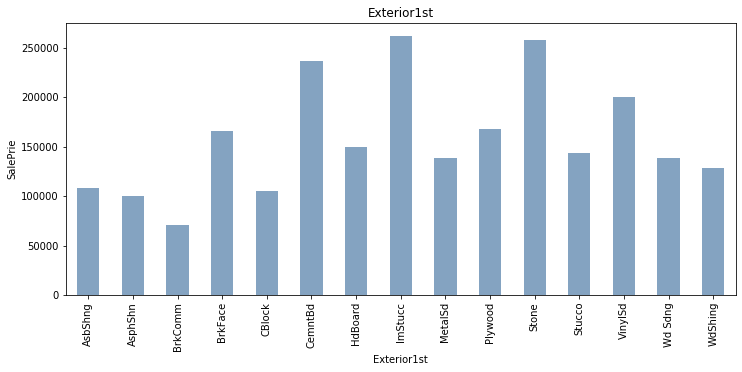

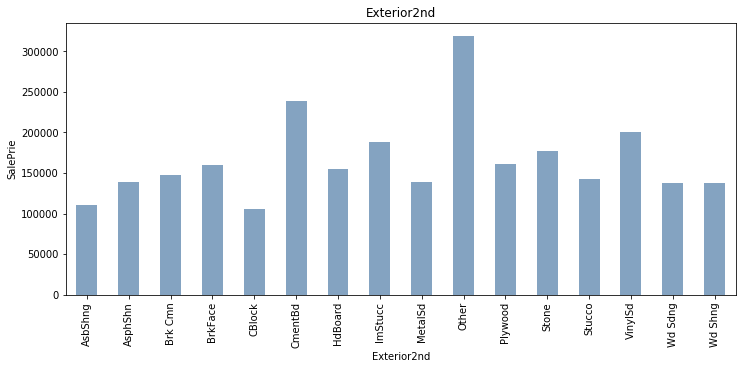

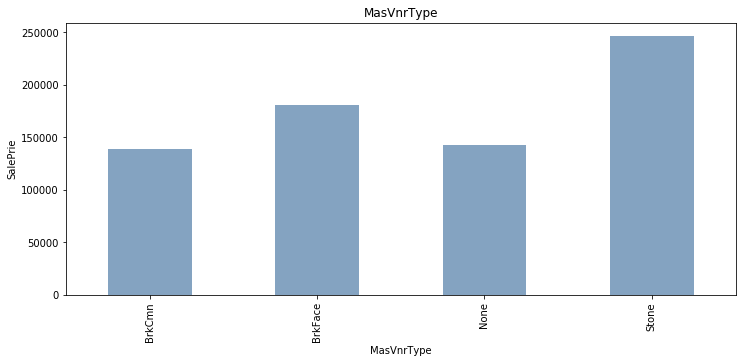

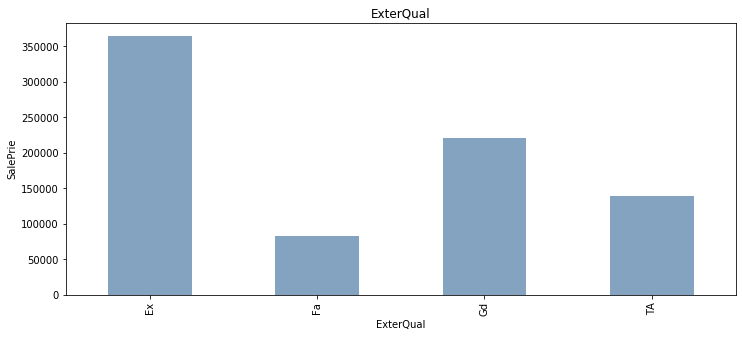

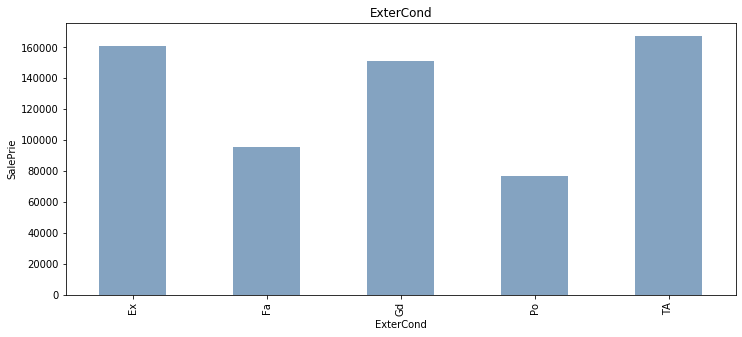

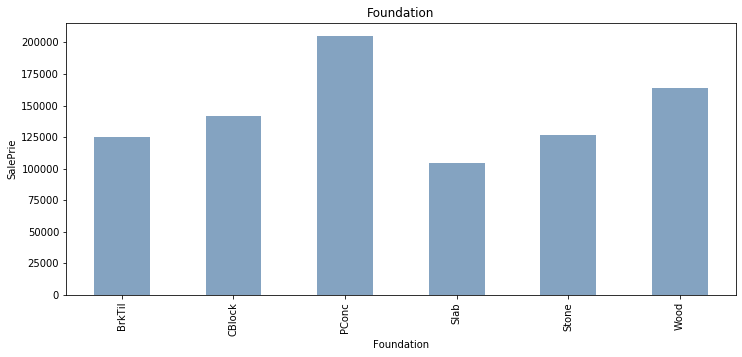

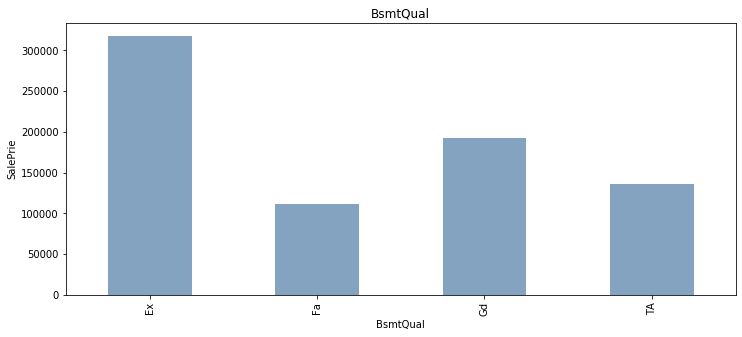

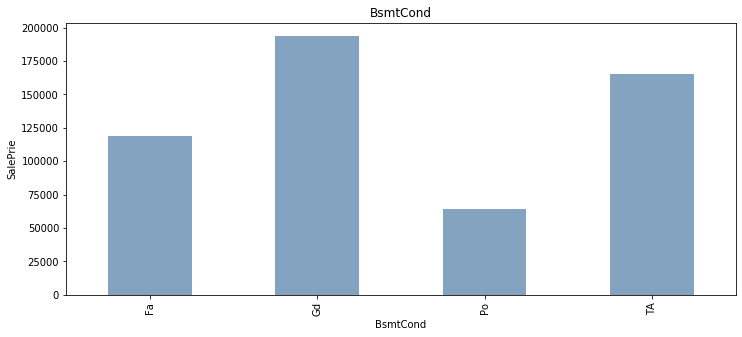

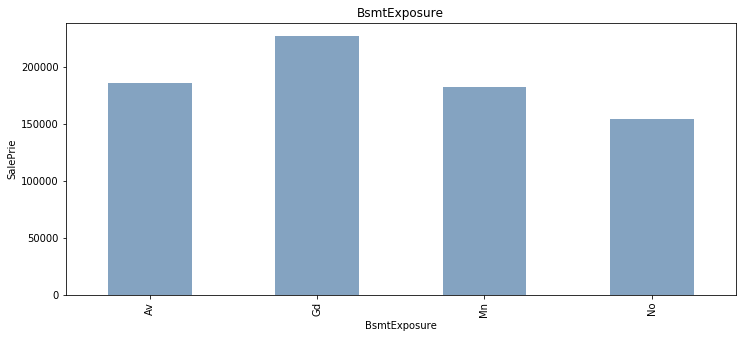

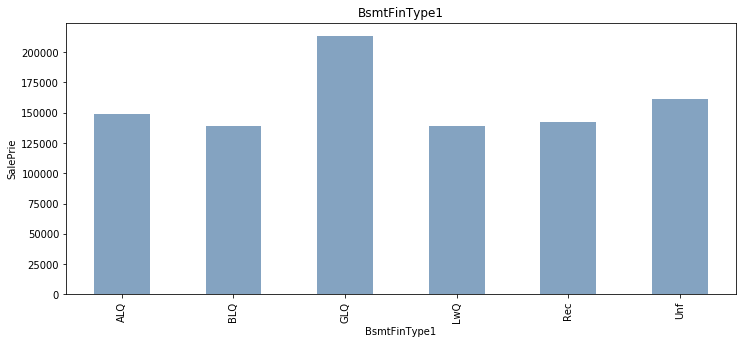

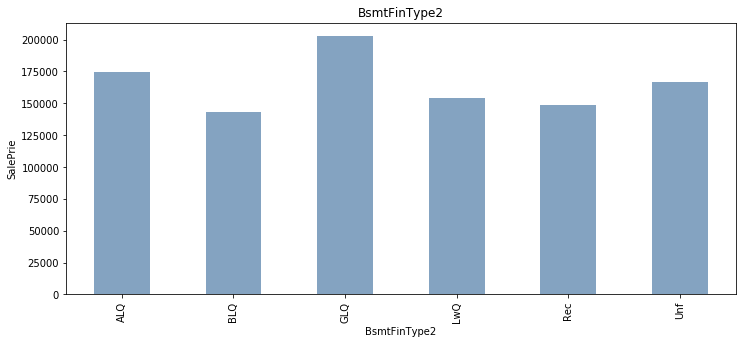

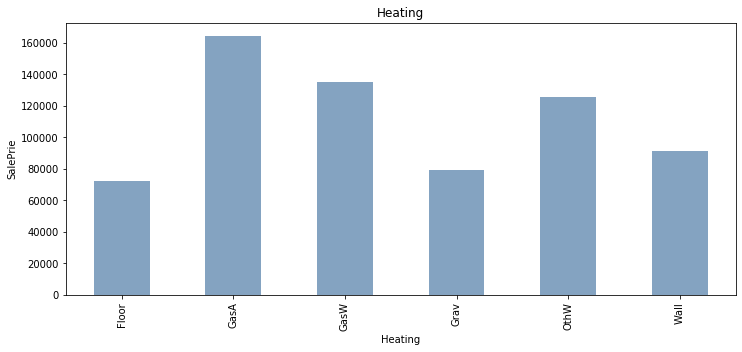

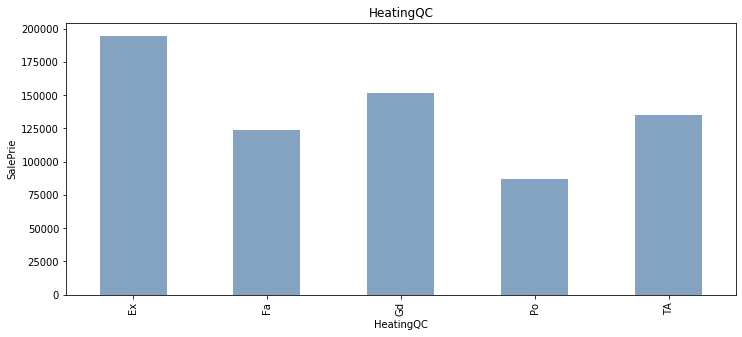

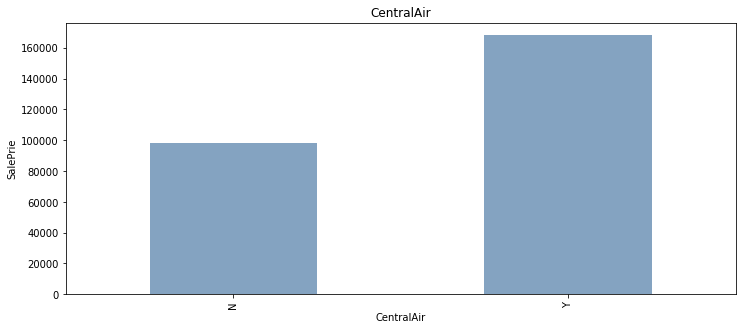

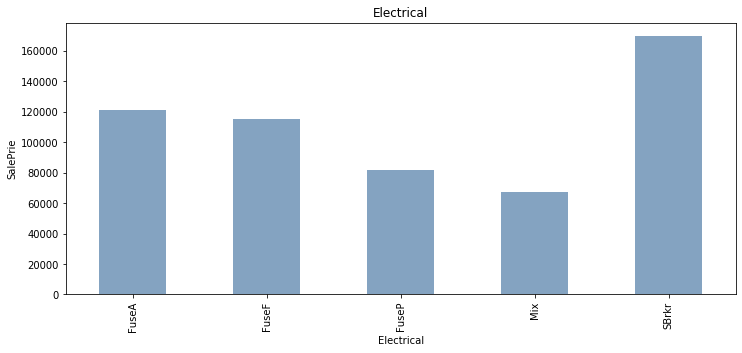

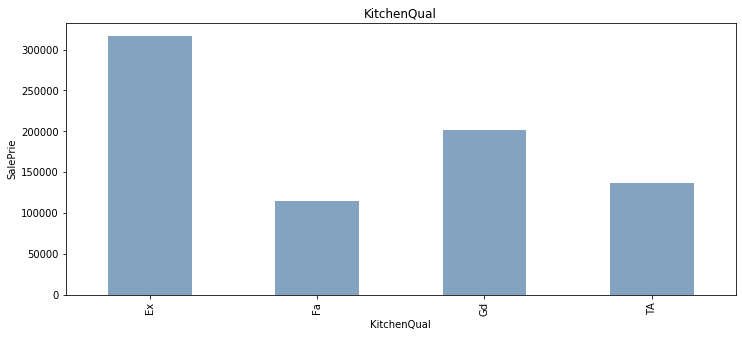

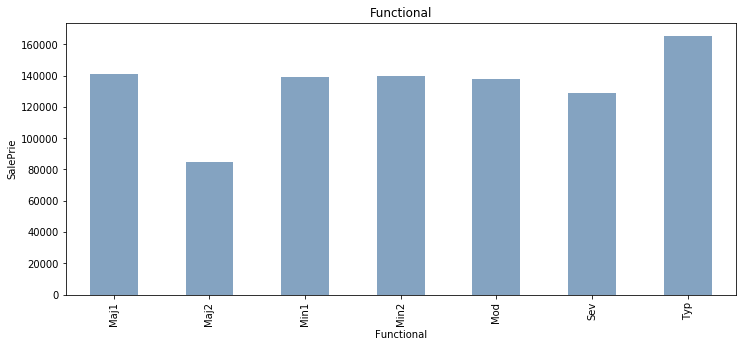

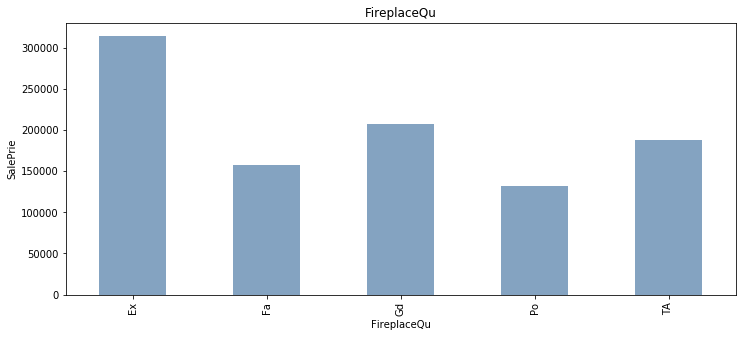

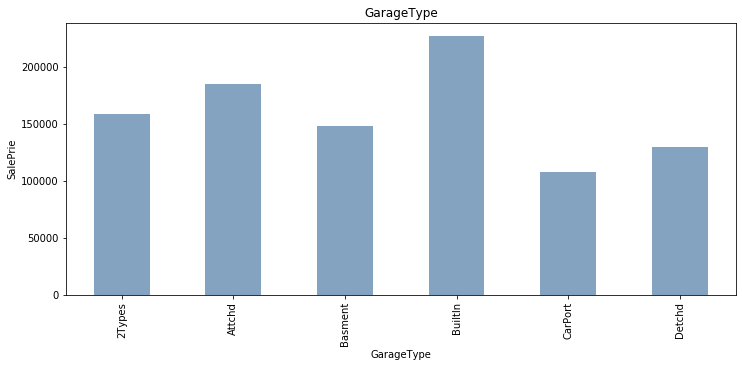

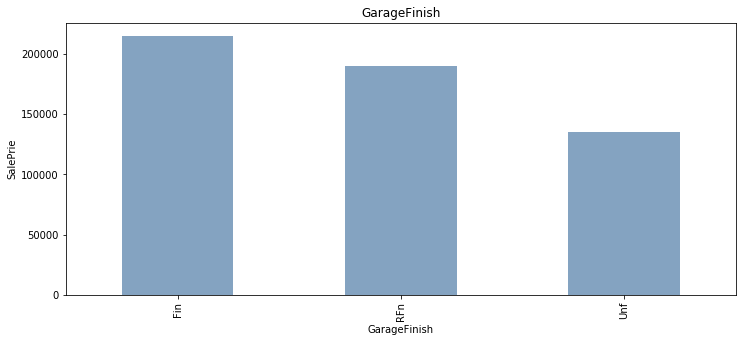

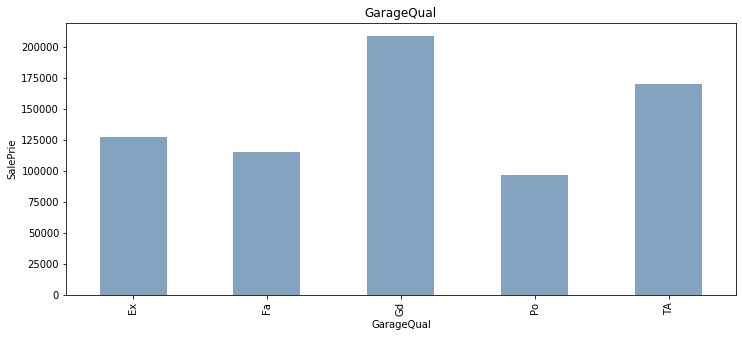

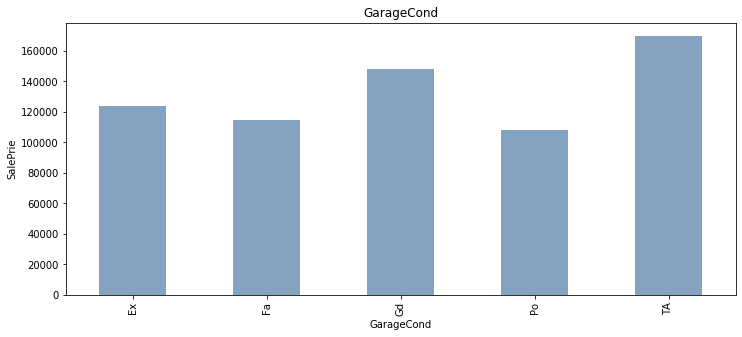

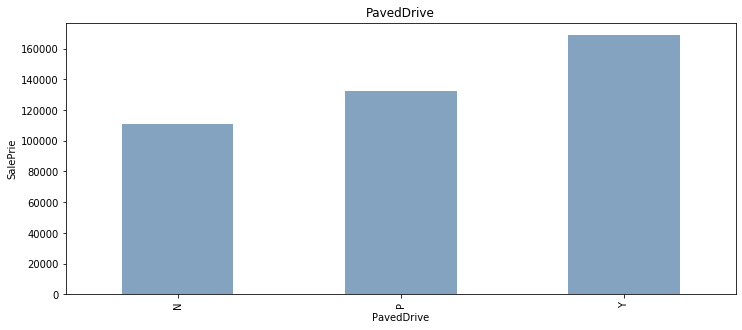

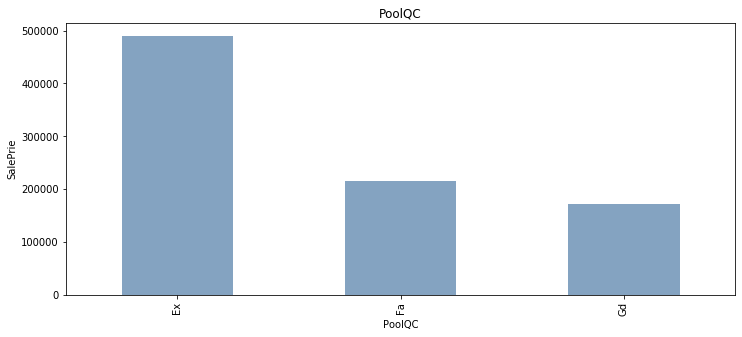

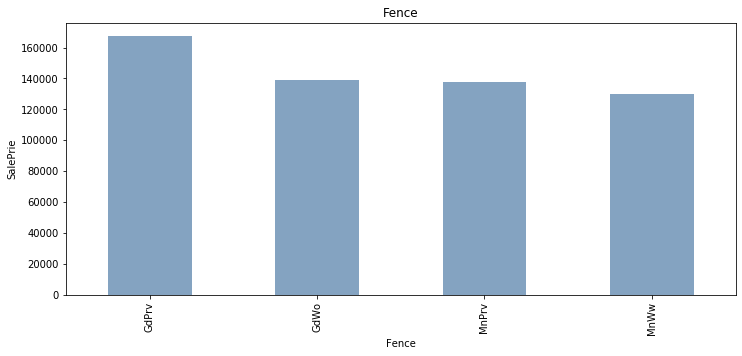

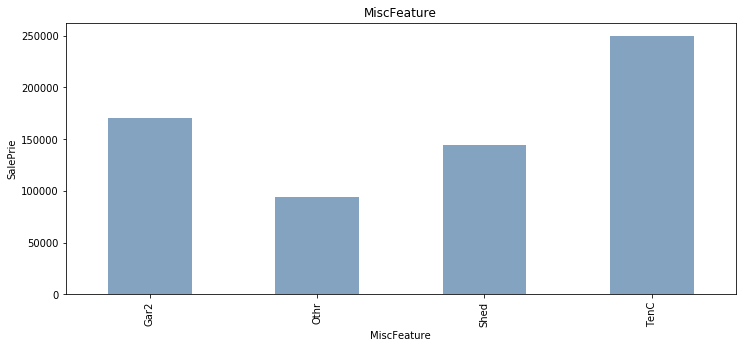

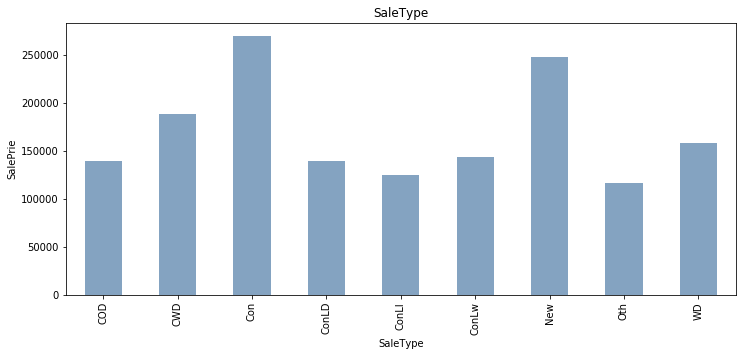

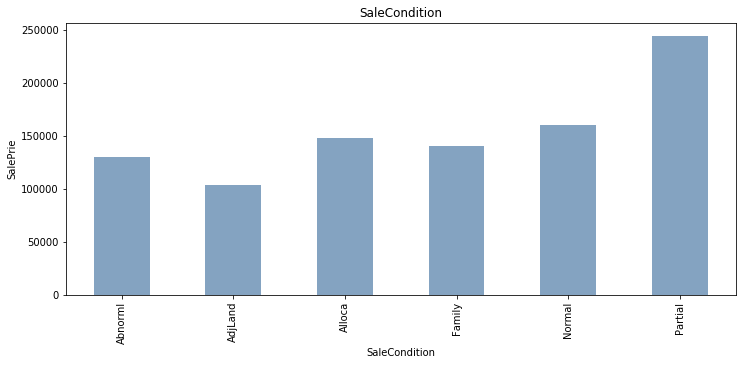

In [74]:
for feature in categorical_features:
    data = dataset.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar(figsize=(12,5),color=(0.2, 0.4, 0.6, 0.6))
    plt.xlabel(feature)
    plt.ylabel('SalePrie')
    plt.title(feature)
    plt.show()

<b>This is the end of exploratory data analysis based on the data we have now lets go for feature engineering</b>

<b>---EOF---</b>